# Arden Chaing

##### Phys 434
##### November 22nd, 2020
##### Lab 6

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', size=22)
matplotlib.rc('figure', figsize=(18, 10))
from scipy import stats

# Set Up

I chose the LHC data. In order to make a fake background I decided to generate 100,000 random poisson distributed numbers using scipy.stats.poisson.rvs. I made it so the Poisson distribution has $\mu =100$.

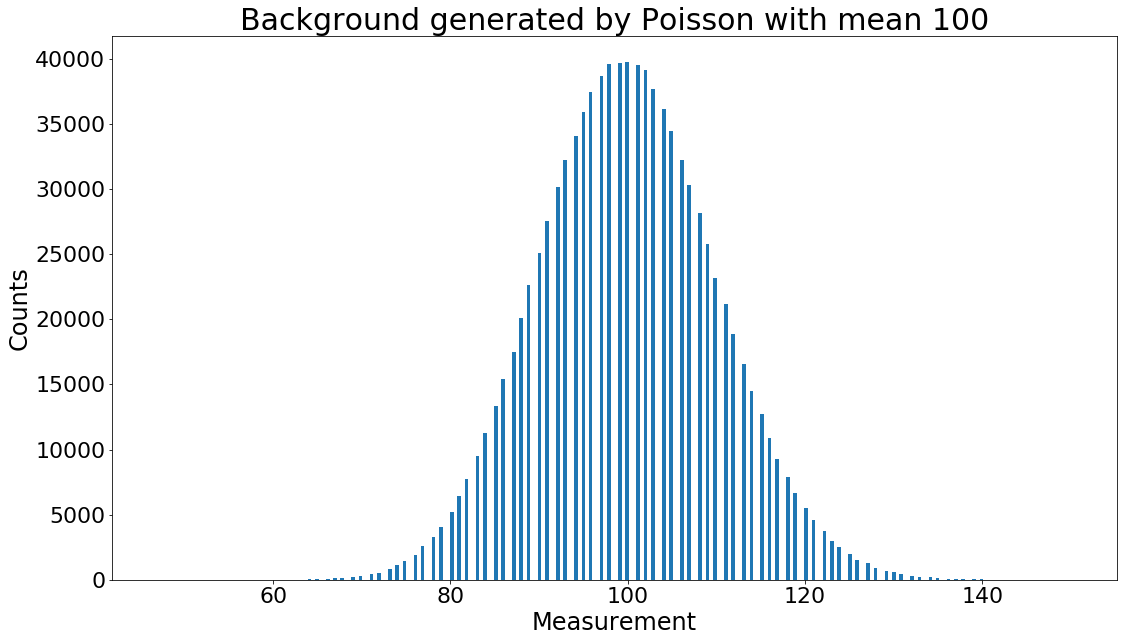

In [2]:
r = stats.poisson.rvs(100,size=1000000)
plt.hist(r,bins=250)
plt.ylabel("Counts", fontsize = '24')
plt.xlabel("Measurement", fontsize = '24')
plt.title("Background generated by Poisson with mean 100", fontsize = '30')
plt.show()

# Problem 1

Find the 5-sigma sensitivity threshold.

The probability of a 5-sigma event for a standard normal distribution is 0.9999997133484281. The value associated to a 5-sigma event for a poisson distribution with a mean around 100 is 154.0. Thus the 5-sigma sensitivity threshold for our fake background is 154. 

In [3]:
sig = stats.norm.cdf(5)   
ans= stats.poisson.ppf(sig,100)
print("The threshold value is: ", ans)

The threshold value is:  154.0


# Problem 2a

Inject a single signal multiple times into the background, between the range of 8-30 sigma.

We now need to generate the signal which will also be counting particle events. This means that our signal will also be Poisson distributed. We will pick 250 as the mean value for this Poisson signal injection, which falls within that range.

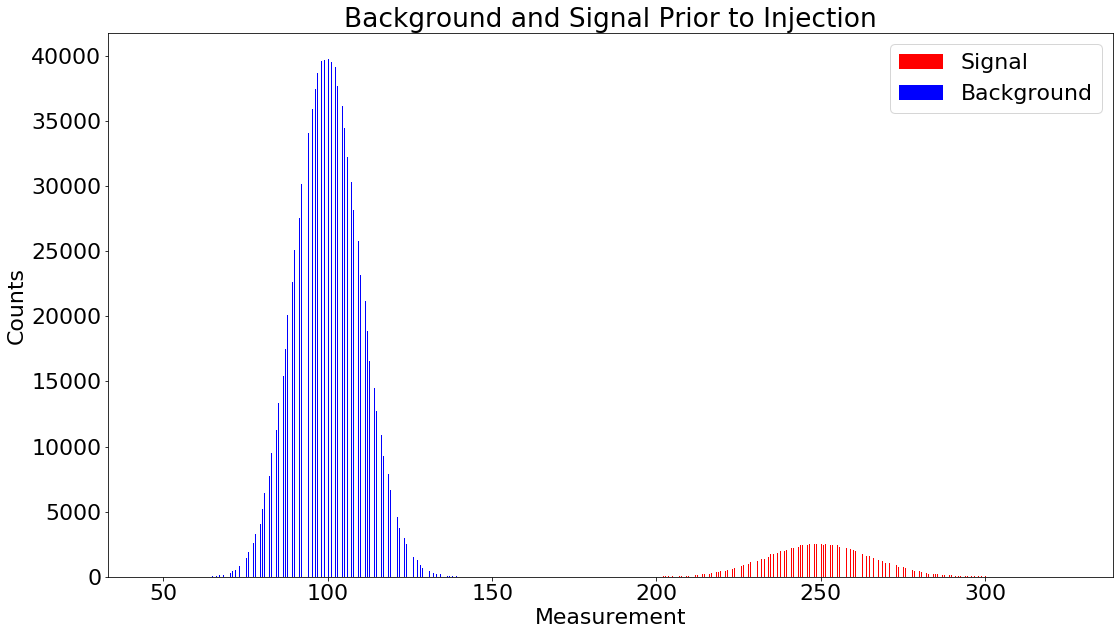

In [4]:
signal_mean = 250
signal = stats.poisson.rvs(signal_mean,size=100000)
plt.hist([signal, r], bins = 400, color=['red','blue'],label=['Signal', 'Background'])
plt.title("Background and Signal Prior to Injection")
plt.xlabel("Measurement")
plt.ylabel("Counts")
plt.legend()
plt.show()

From the plot above, we can confirm that signal is a Poisson distribution with a mean of 250. We can also see that there is no overlap between the two distributions here. Let's see what happens when we inject the signal into our background.

# Problem 2b

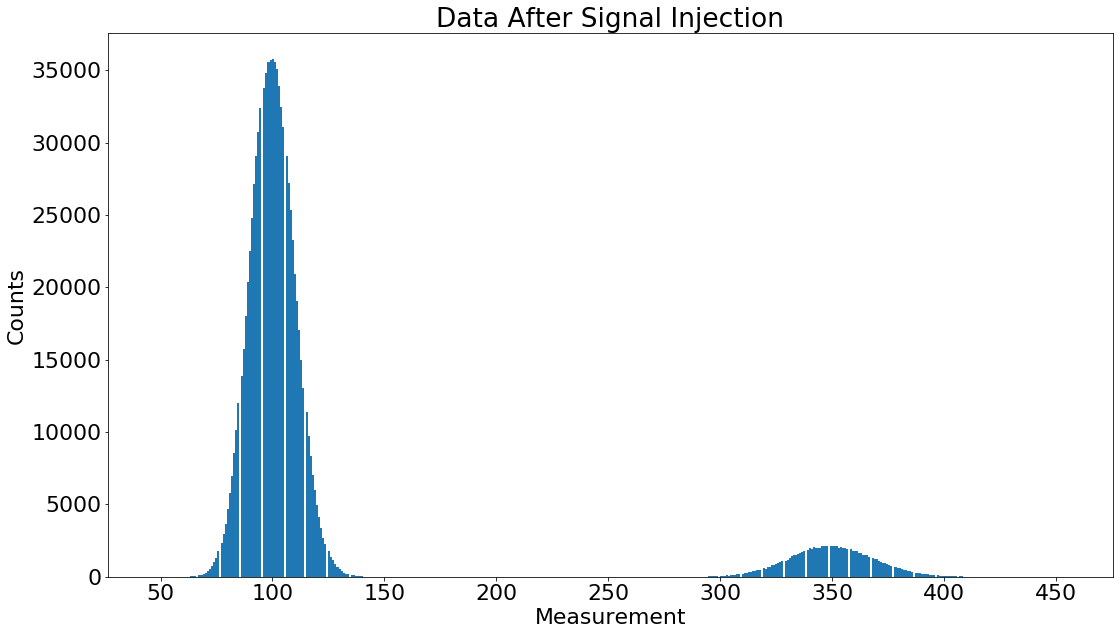

In [5]:
mixed = np.zeros(r.size)
for i in range(mixed.size):
    if i < signal.size:
        mixed[i] = np.add(r[i], signal[i])
    else:
        mixed[i] = r[i]
plt.hist(mixed,bins = 450)
plt.title('Data After Signal Injection')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

The mean has moved from 250 to 350. The distance it has moved to the right, 100, is exactly the mean of the background distribution, and this is no coincidence. On average, the background produces 100 particle events, so if on average the signal, independent of the background, produces 250 particle events, then of course since both events are happening at the same time, the overall number of observed particles in an average signal event, when we take the background into account, will be the sum of the particles from the background plus the particles from the signal, which on average is going to be 250 + 100 = 350. So it makes perfect sense that the mean moved 100 units to the right for the signal. It retained its shape as a Poisson distribution because the sum of Poisson distributions is a Poisson distribution, naturally. The net effect of all of this is that the observed measurement is not a measurement of the signal, but a measurement of the signal plus background, so that  the observed value is more likely to be stronger than the true injected signal. Even though it's a poisson distribution, due to the central limit theorem, the signal looks gaussian. So for the large sample size I have, it seems symmetric. 

# Problem 3a

The plotted histogram shows the relationship for the probability of occurrence of any injected signal given an observed signal. The strongest relationship can be observed right along the diagonal for an injected signal to show up. Taking and analyzing a sample point it seems that the offset between the injected signal and the observed signal is 100. Which is the value of the mean of our poisson background distribution.

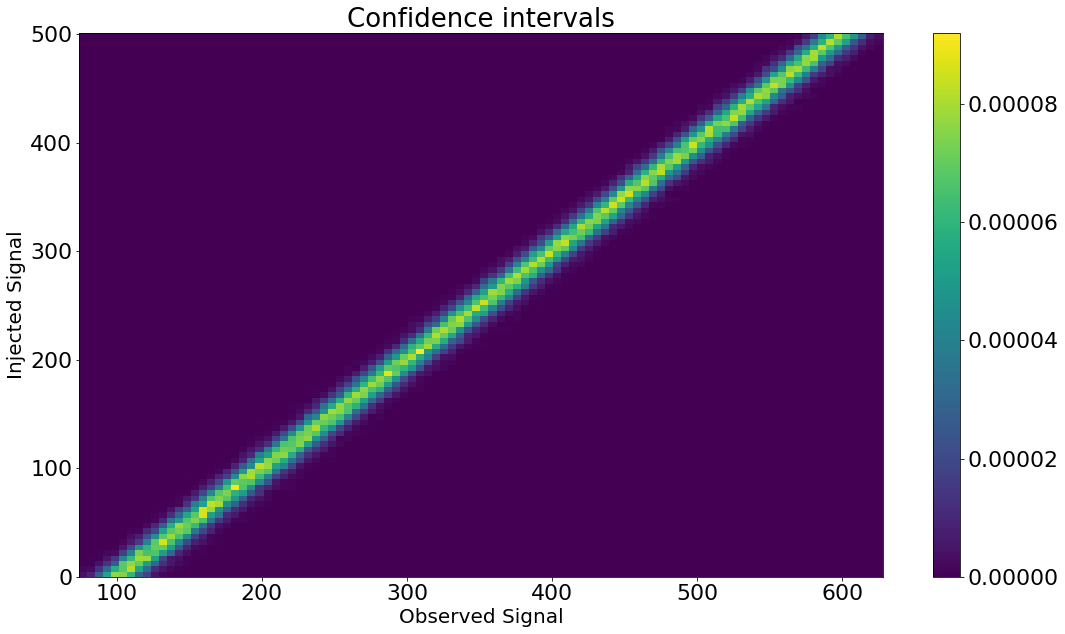

In [6]:
noise = stats.poisson.rvs(mu=100, size=100000)
injection = np.linspace(0,501,100000)

observed = noise + injection

h = plt.hist2d(observed, injection, bins = (100,100), density=True)
plt.colorbar(h[3])
plt.ylabel("Injected Signal", fontsize = "20")
plt.xlabel("Observed Signal", fontsize = "20")
plt.title("Confidence intervals", fontsize = "26")
plt.show()

# Problem 3b

In order to check with the previous result, we sample from the background many times and add to each sampled value the mean of the signal we had in the previously (250).

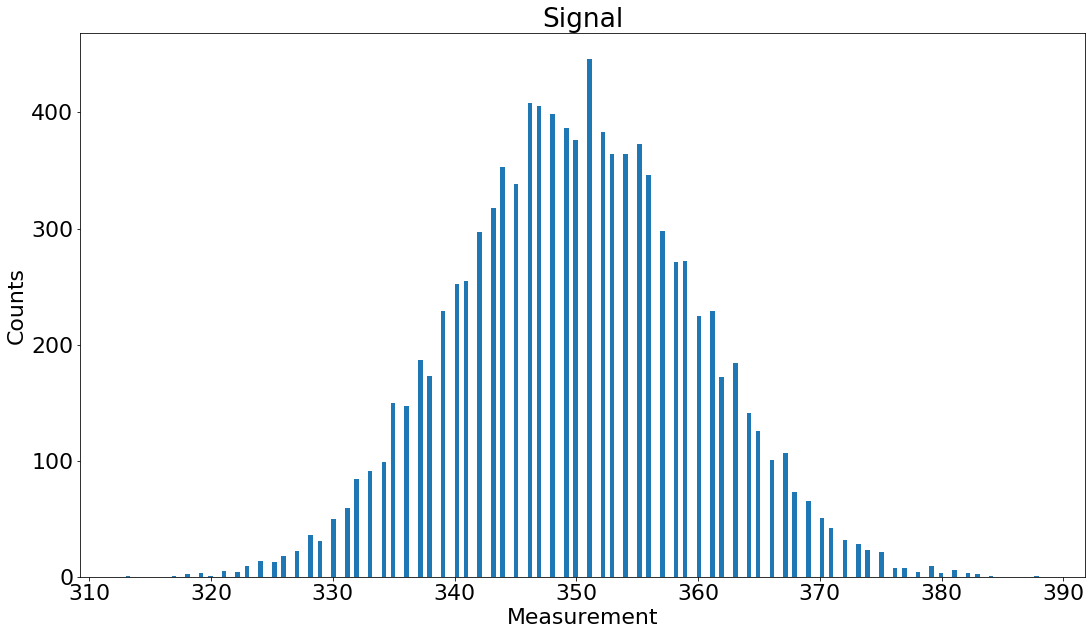

In [7]:
a1 = stats.poisson.rvs(100, size = 10000)
b1 = np.array([])
signal = 250
for i in a1:
    b1 = np.append(b1, i + signal)
    
plt.hist(b1, bins = 200)
plt.title('Signal')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

We see a Poisson distribution with a mean of 350, which is what we had before.

# Problem 3c

Now we reverse, so we want to know the what the original injected signal was from the observed one. We saw from previous questions that they only were offset by the mean, so we can subtract the background and be left with the signal. For this example we will use mean of 400.

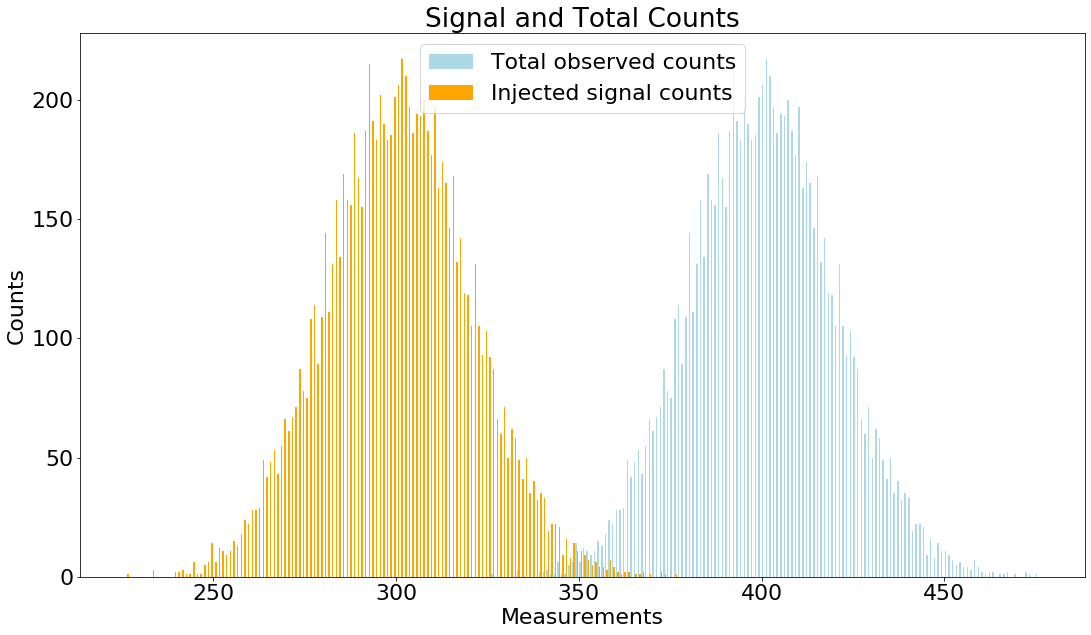

In [8]:
new_mean = 400
bg_mean = 100
new_sample = stats.poisson.rvs(new_mean, size=10000)
al = np.array([])
for i in new_sample:
    al = np.append(al, i - bg_mean)
    
plt.hist([new_sample, al], bins = 250, color=['lightblue', 'orange'], label=['Total observed counts', 'Injected signal counts'])
plt.title('Signal and Total Counts')
plt.xlabel('Measurements')
plt.ylabel('Counts')
plt.legend()
plt.show()

We can confirm again that these distributions look like previous distributions. The injected signal distribution is independent of the background, it is made from the signal alone and without contribution from the background.

# Problem 3d and 3e

We can start by normalizing to obtain a pdf. We can then integrate it from the mean to the 1 sigma probability on both sides. In our case the center is 300. 

In [9]:
samp1 = stats.norm.cdf(1)
N = a1.size
r = 1
p = 0
while p < samp1:
    p = 0
    for i in al:
        if (i <= r + 300) and (i >= -r + 300):
            p += (1 / N)
    r += 1
print('We integrated up to a distance of {} units from the mean.'.format(r))

We integrated up to a distance of 29 units from the mean.


I claim this range we integrated over gives the range of our 1 sigma uncertainty in the signal strength. To see this, observe that our sample is large enough to be practically representative of the true signal; the probability that the true signal give a data point outside of our range is practically zero. This is the assumption made when we normalize our data and claim it to be a distribution. Next, this means we are assuming the true signal mean will lie somewhere among these values. Then, the fraction of all values of the distribution contained within some range ought to give the probability that the true mean lies in the range. So, we integrate on the distribution until we hit a 1 sigma probability to get a range that we are 1 sigma certain will contain the true mean. Note we made the assumption (to ease calculations) that the true distribution is approximately symmetric in this case, which we know to be true here, as we are dealing with Poisson distributions. This allowed us to integrate symmetrically outwards on the distribution from the mean. We also were able to deduce the mean of this particular signal exactly from previous parts, but in general, we would need to calculate the exact mean. Integrating out from the mean may also not be symmetric in all cases, but as there is a possibility the true signal strength lies above or below the mean here, and we know the signal to be symmetric here, then we can integrate symmetrically outwards from our known mean.